# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [8]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...

iris_df['species'] = iris_data.target

iris_df.head()


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


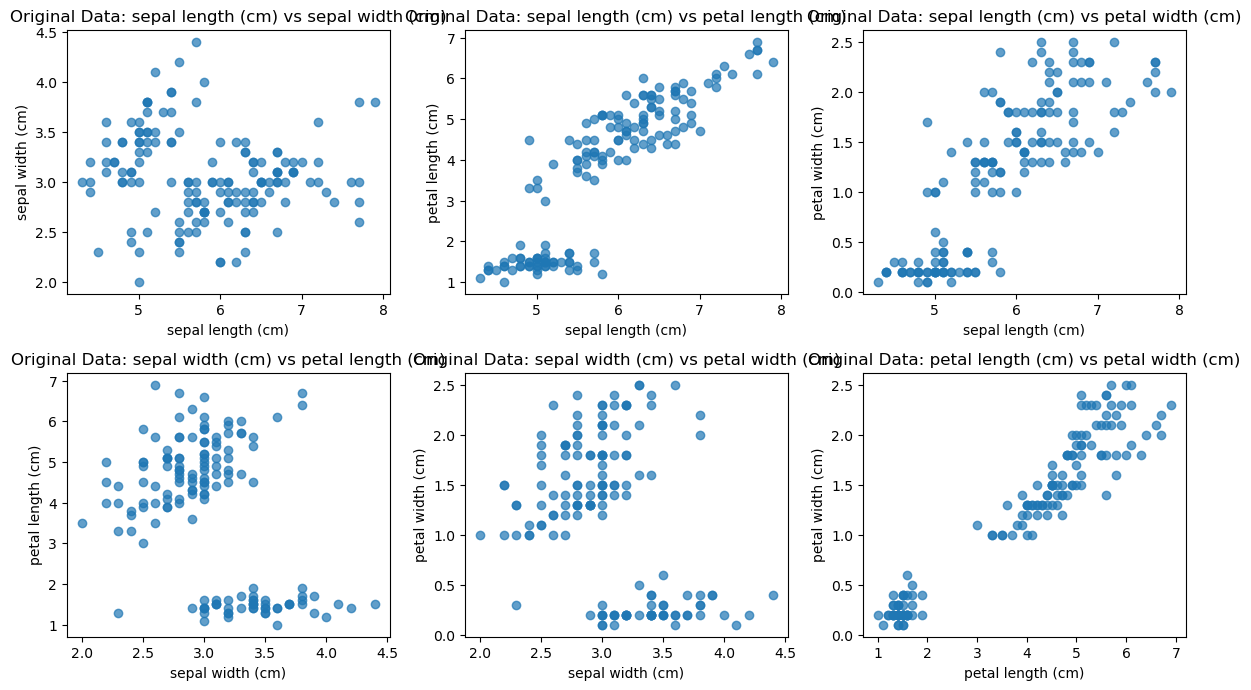

In [5]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Your answer...

### Sepal Length vs. Sepal Width:

You may observe that the Iris Setosa species tends to cluster in one area, showing a clear separation from Iris Versicolor and Iris Virginica. This can indicate that sepal length and width can be good distinguishing features for Setosa.

### Petal Length vs. Petal Width:
There is often a strong separation between the three species. Iris Setosa can be distinctly separated from the other two species, while Iris Versicolor and Iris Virginica may overlap somewhat. The petal length and width are particularly effective features for distinguishing between the species.

### Sepal vs. Petal Features:
Comparing sepal features (length and width) against petal features (length and width) can reveal that petal measurements are more effective for distinguishing between the species, especially between Versicolor and Virginica, where the overlap is less pronounced.

The visualizations here indicate the petal length and width provide better separation among species compared to sepal features. The clear clusters formed in the scatter plots imply that K-Means or other clustering algorithms could be effectively applied to identify and classify the species based on these features.

#### **Question 3:** 
#### Data cleaning

In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_df.columns[:-1])

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.


> Your answer here ... 

### Clustering algorithms are sensitive to scale:
Many machine learning algorithms, including K-Means, are distance-based. K-Means clusters data by minimizing the distance between data points and the centroids of clusters.
If features in the dataset have different scales, those with larger numerical ranges will disproportionately influence the clustering results. For example, in the Iris dataset, if one feature like sepal length has values in the range of 4-7, and petal width is in the range of 0-3, the clustering algorithm may prioritize the feature with the larger range, ignoring others.

### Equal contribution of features:
Standardizing the features ensures that each feature contributes equally to the clustering process. Standardization scales the data such that the mean of each feature is 0, and the standard deviation is 1. This way, all features have comparable magnitudes and their distances can be fairly measured.
This is particularly important in datasets where features have different units (e.g., centimeters, kilograms, etc.).

When features are not standardized, K-Means might form clusters that are biased towards features with larger ranges. As a result, the clustering will not reflect the true underlying patterns in the data, and some features may dominate the clustering process unfairly. Using unstandardized data can lead to inaccurate results and interpretations. For example, if sepal length has a larger range than petal length, K-Means may form clusters primarily based on sepal length, ignoring meaningful differences in petal length that could help distinguish between species.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

c:\Users\prsrivastava\.conda\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


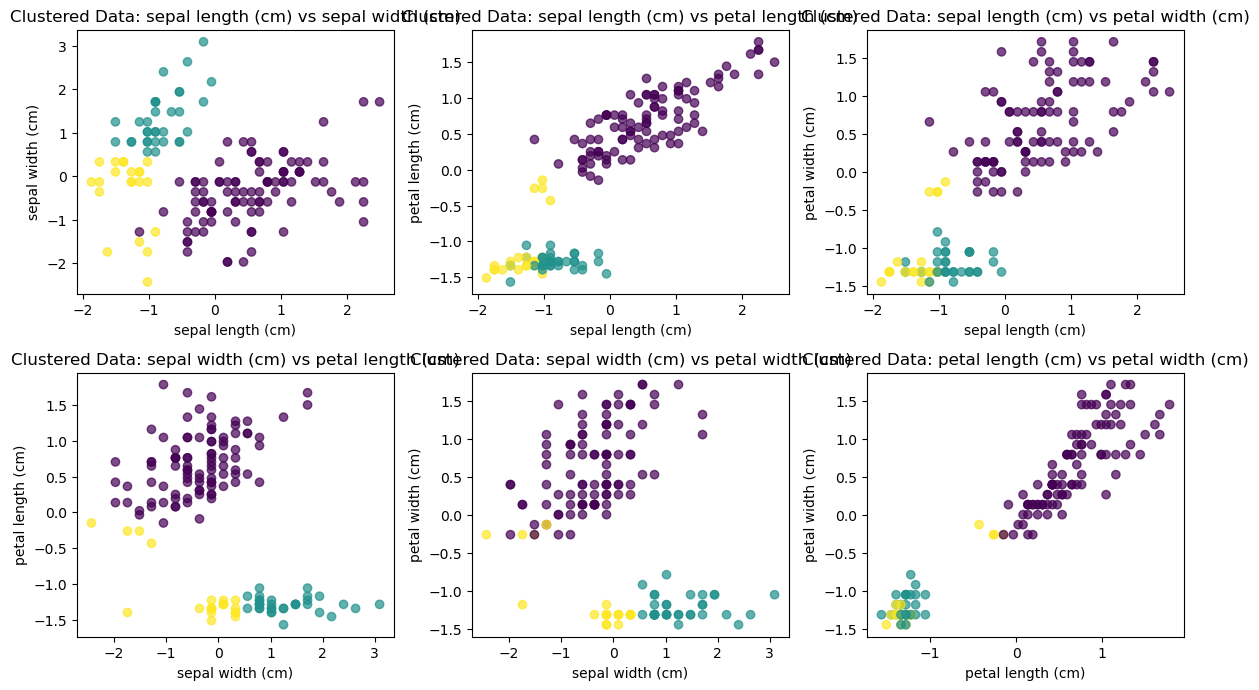

In [24]:
# Your answer...

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustered_iris_data = kmeans.fit_predict(scaled_iris_df)

# Add the cluster labels to the original DataFrame
iris_df['cluster'] = clustered_iris_data

# Display the first few rows with the cluster labels
iris_df.head()

# Plot the feature pairs, coloring by cluster labels
plot_feature_pairs(scaled_iris_df, scaled_iris_df.columns, color_labels=clustered_iris_data, title_prefix='Clustered Data: ')


We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...

### The Elbow Method:

Explanation:
In the Elbow Method, you run the K-Means algorithm for different values of k (the number of clusters), typically starting from 1 to a larger value (e.g., 10).
For each value of k, you calculate the Within-Cluster Sum of Squares (WCSS), also known as inertia. This value measures the total squared distances between data points and their respective cluster centroids.
As you increase k, the WCSS decreases because the clusters become smaller and better fit the data points.

How to Use the Elbow Method:
Plot the WCSS against different values of k.
The plot will show a rapid decrease in WCSS as k increases, but at some point, the rate of decrease slows down significantly. This point, where the plot starts to "bend" like an elbow, is considered the optimal number of clusters.

The Elbow Method helps avoid overfitting or underfitting. Choosing too few clusters (e.g., k=1) might result in high variance within clusters, while too many clusters (e.g., k=10) might lead to overfitting, where each cluster has too few points.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [25]:
# Your answer here...

petal_width = iris_df['petal width (cm)']

np.random.seed(123)
n_bootstrap = 10000
bootstrap_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(petal_width, size=len(petal_width), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

mean_petal_width = np.mean(bootstrap_means)

# Compute the 90% confidence interval (5th and 95th percentiles)
lower_bound = np.percentile(bootstrap_means, 5)
upper_bound = np.percentile(bootstrap_means, 95)


# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 1.2001690666666665
90% Confidence Interval of Mean Petal Width: (1.0979666666666665, 1.302)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...

Bootstrapping is a statistical technique used to estimate the distribution of a sample statistic (in this case, the mean) by resampling with replacement. In this context, we use bootstrapping to gain insights into the variability and reliability of the mean Petal Width.



For the code here, The sample size for the Iris dataset is relatively small (150 data points). Bootstrapping helps us understand how much variability we might expect in the sample mean by generating many resamples and calculating their means.

It allows us to approximate the sampling distribution of the mean without making strong assumptions about the underlying population distribution (like normality).

What does it help us understand?
Bootstrapping helps us understand how the mean of the Petal Width might vary if we were to collect many samples from the population. Specifically, it helps us quantify the variability in the mean estimate, giving us a better sense of the accuracy of our sample mean.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...

The 90% confidence interval we calculate from the bootstrap samples provides a range within which we are 90% confident that the true population mean of the Petal Width lies.
It gives us a range of plausible values for the mean based on the variability observed in the bootstrap samples.

Interpreting the variability of the estimate:
A narrow confidence interval implies that the mean is estimated with high precision (i.e., low variability), whereas a wider interval indicates greater uncertainty and more variability in the estimate.
In our case, the confidence interval shows the range of variability we can expect for the mean of the petal width if we were to take many samples from the population.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...

After bootstrapping and generating 10,000 means, the spread of the bootstrap sample means (observed through the confidence interval and possibly a histogram of the means) shows how stable or variable the estimate of the mean is.

If the distribution of bootstrapped means is centered tightly around a single value with a small spread, it suggests that the mean is a stable estimate of the petal width and is likely representative of the true population mean.

However, if the bootstrapped means exhibit high variability and the confidence interval is wide, it suggests that the mean might not be as reliable, and the estimate could change significantly with different samples.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
